Estimated Demands
=================



After having estimated a demand system using data from our favorite country, we can imagine different counterfactual scenarios.  What if prices were different?  What if we give a cash transfer to a household?  What if school fees reduce the budget for food?



In [15]:
from cfe import regression as rgsn
import numpy as np

r = rgsn.read_pickle('foo.pickle')  # Assumes you've already set this up

xhat = r.predicted_expenditures()

# Implied relative prices
p = np.exp(r.get_Ar())

Set up reference prices (just what&rsquo;s observed, get this from `r.get_Ar()`, which give relative prices)



<IPython.core.display.Javascript object>


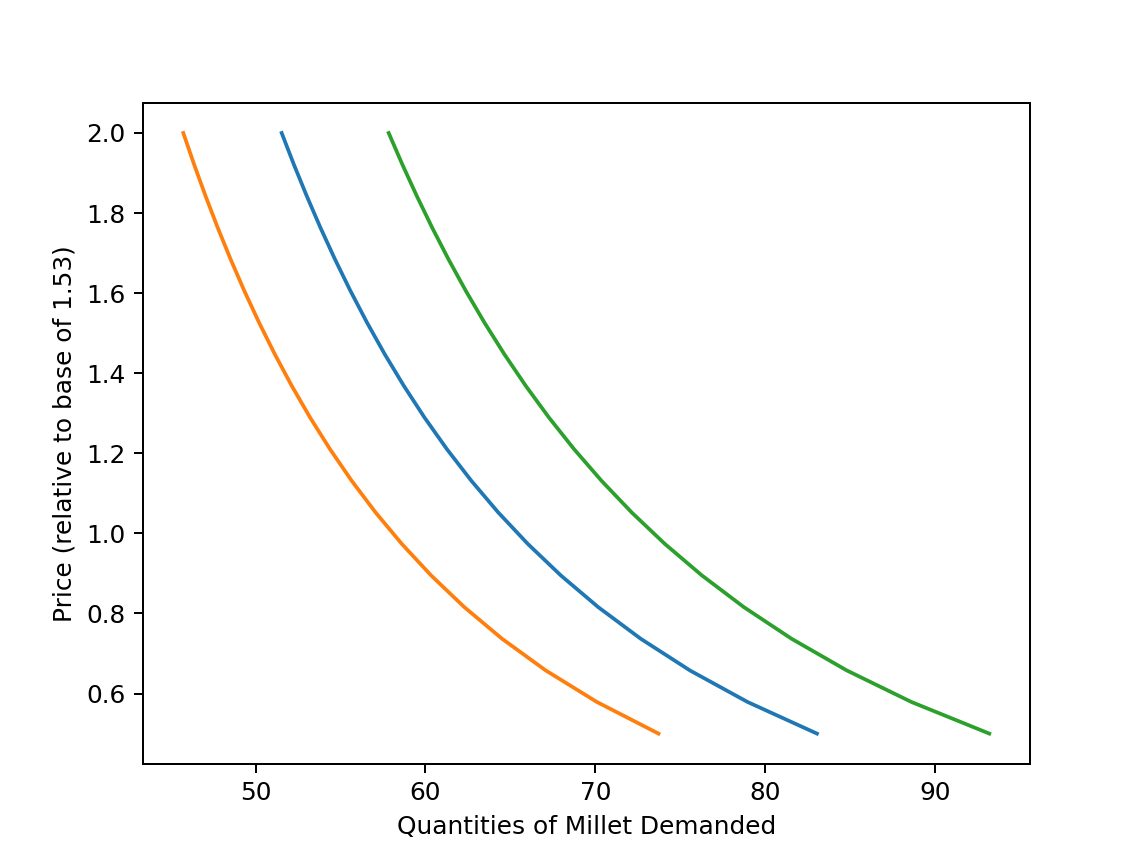

Text(0.5, 0, 'Quantities of Millet Demanded')

In [16]:
import matplotlib.pyplot as plt
%matplotlib notebook

use = 'Millet'  # Good we want demand curve for

scale = np.linspace(.5,2,20)

# Total food expenditures per household
xbar = xhat.groupby(['i','t','m']).sum()

# Reference budget
xref = xbar.quantile(0.5)  # Household at 0.5 quantile is median

# Reference prices
pbar = p.xs('2019-20',level='t').groupby('j').mean()
#pbar = pbar[use]

def my_prices(p0,p=pbar,j='Millet'):
    """
    This just changes the price of good j, holding other prices constant
    """
    p = p.copy()
    p.loc[j] = p0
    return p


# Demand for Millet for household at median budget
plt.plot([r.demands(xref,my_prices(pbar[use]*s,pbar))[use] for s in scale],scale)

# Demand for Millet for household at 25% percentile
plt.plot([r.demands(xbar.quantile(0.25),my_prices(pbar[use]*s,pbar))[use] for s in scale],scale)

# Demand for Millet for household at 75% percentile
plt.plot([r.demands(xbar.quantile(0.75),my_prices(pbar[use]*s,pbar))[use] for s in scale],scale)

plt.ylabel(f"Price (relative to base of {pbar[use]:.2f})")
plt.xlabel(f"Quantities of {use} Demanded")

Now consider plotting Engel curves (demand vs. budget) for different goods



In [21]:
r.demands(20000,pbar).index.tolist()

['Beans',
 'Beef',
 'Biscuits',
 'Bread',
 'Cabbages',
 'Cassava',
 'Chapati',
 'Cooking Oil',
 'Dodo',
 'Eggs',
 'Fish (dried)',
 'Fish (fresh)',
 'Goat',
 'Ground Nuts',
 'Maize',
 'Mangos',
 'Matoke',
 'Milk (fresh)',
 'Millet',
 'Onions',
 'Oranges',
 'Other Fruits',
 'Other Veg.',
 'Peas',
 'Pork',
 'Rice',
 'Salt',
 'Sim Sim',
 'Soda',
 'Sorghum',
 'Sweet Bananas',
 'Sweet Potatoes',
 'Tea',
 'Tomatoes',
 'Waragi']

<IPython.core.display.Javascript object>


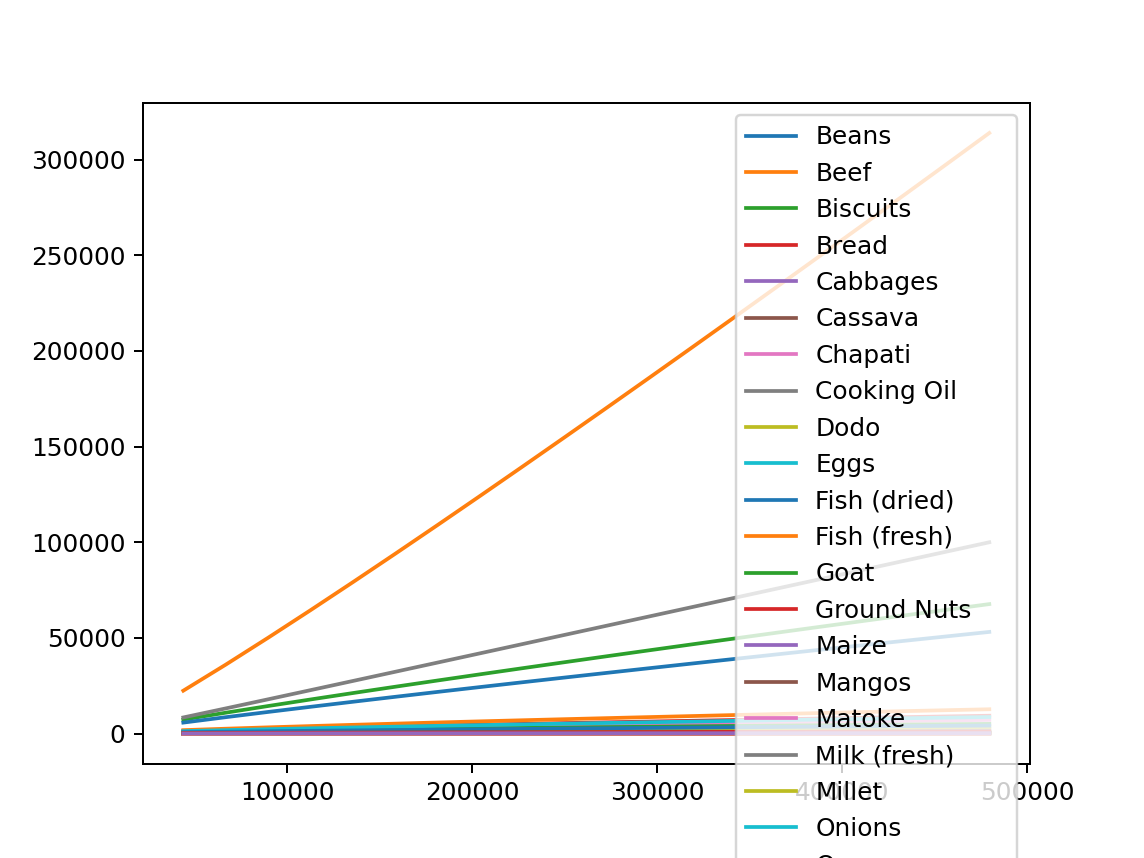

In [22]:
fig,ax = plt.subplots()

# Different budgets to evaluate demands at.
X = np.linspace(xbar.quantile(0.001),xbar.quantile(0.99),20)

ax.plot(X,[r.demands(x,pbar) for x in X])
ax.legend(r.demands(xref,pbar).index.tolist())